In [67]:
#Dependencies
import glob,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

In [68]:
#Stock movement data through yahoo finance and daily reurn calculation
Data=yf.download(['KO','PEP'],start='2012-01-01',end='2022-11-14')['Adj Close']
Data['KO_Return']=(Data['KO']/Data['KO'].shift(1))-1
Data['PEP_Return']=(Data['PEP']/Data['PEP'].shift(1))-1

[*********************100%***********************]  2 of 2 completed


In [69]:
Data=Data.dropna()

In [70]:
Data

,KO,PEP,KO_Return,PEP_Return
Date,,,,
2012-01-04,24.745810,48.538540,-0.006273,0.005120
2012-01-05,24.628649,48.160358,-0.004735,-0.007791
2012-01-06,24.472431,47.556717,-0.006343,-0.012534
2012-01-09,24.472431,47.804001,0.000000,0.005200
2012-01-10,24.617994,47.753090,0.005948,-0.001065
...,...,...,...,...
2022-11-07,59.071060,179.092865,0.003881,0.007999
2022-11-08,59.180283,179.589767,0.001849,0.002775
2022-11-09,58.356129,177.443146,-0.013926,-0.011953


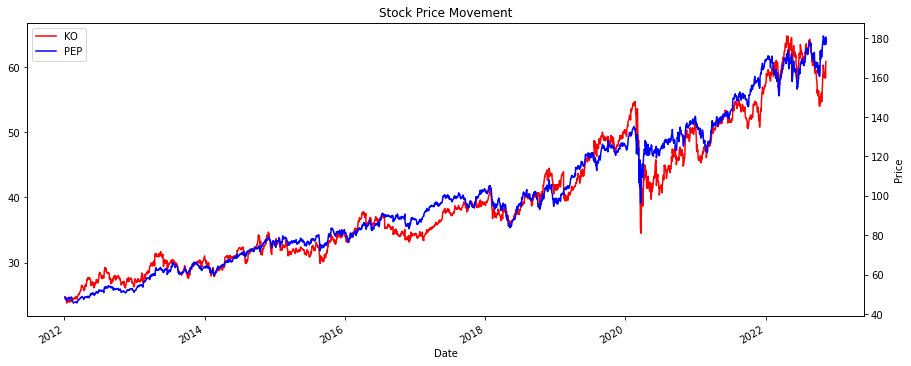

In [71]:
#Graph of stock price of KO vs PEP
plt.figure(figsize=(15,6))
ax1=Data['KO'].plot(c='red',label='KO')
ax2=Data['PEP'].plot(c='blue',label='PEP',secondary_y=True)
h1,l1=ax1.get_legend_handles_labels()
h2,l2=ax2.get_legend_handles_labels()
plt.legend(h1+h2,l1+l2,loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Movement')
plt.show()

In [72]:
#Standard Deviation and correlation to check if stocks are viable for this model... 
STD1=Data['KO'].std()
STD2=Data['PEP'].std()
corr=np.cov(Data['KO'],Data['PEP'])[0,1]/(STD1*STD2)
corr

0.9827210125013436

In [95]:
#Checking if stocks have a low p-value... if yes then stocks are co-integrated which makes the pair good for this model
#Most important indicator for wether stocks are good for stat arb
score,pvalue,_=coint(Data['KO'],Data['PEP'])
pvalue


0.002131394479720263

In [74]:
Data['Price_Difference']=Data['PEP']-Data['KO']

In [75]:
Data['Rolling_Price_Difference_Average']=Data['Price_Difference'].rolling(window=30).agg(['mean'])

In [76]:
Data['Rolling_Price_Difference_std']=Data['Price_Difference'].rolling(window=30).agg(['std'])

In [77]:
#30 days of rolling average and stand deviation so first 29 days would have no data as a minimum of 30 days are reqiured to calculate average and S.d.
#Data.dropna() removes the empty rows (first 29)
Data.tail(30)
Data=Data.dropna()

In [78]:
Data

,KO,PEP,KO_Return,PEP_Return,Price_Difference,Rolling_Price_Difference_Average,Rolling_Price_Difference_std
Date,,,,,,,
2012-02-15,24.284277,45.869442,-0.007257,-0.007084,21.585165,23.455539,0.780674
2012-02-16,24.447584,45.622169,0.006725,-0.005391,21.174585,23.368267,0.881509
2012-02-17,24.515038,45.585800,0.002759,-0.000797,21.070763,23.286236,0.975292
2012-02-21,24.433388,45.920357,-0.003331,0.007339,21.486969,23.232992,1.028828
2012-02-22,24.586052,45.891254,0.006248,-0.000634,21.305202,23.165446,1.087007
...,...,...,...,...,...,...,...
2022-11-07,59.071060,179.092865,0.003881,0.007999,120.021805,114.464055,5.144331
2022-11-08,59.180283,179.589767,0.001849,0.002775,120.409485,114.844441,5.148113
2022-11-09,58.356129,177.443146,-0.013926,-0.011953,119.087017,115.112486,5.152844


In [79]:
#Calculation of Z-score, marker for when to buy
N=1.5
Data['Z_Score']=(Data['Price_Difference']-Data['Rolling_Price_Difference_Average'])/Data['Rolling_Price_Difference_std']
Data['Spread']=np.log(Data['PEP'])-N*np.log(Data['KO'])
#plt.plot(Data['Spread'])

<ipython-input-79-c9bd7e67338f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Z_Score']=(Data['Price_Difference']-Data['Rolling_Price_Difference_Average'])/Data['Rolling_Price_Difference_std']
<ipython-input-79-c9bd7e67338f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Spread']=np.log(Data['PEP'])-N*np.log(Data['KO'])


In [80]:
Data

,KO,PEP,KO_Return,PEP_Return,Price_Difference,Rolling_Price_Difference_Average,Rolling_Price_Difference_std,Z_Score,Spread
Date,,,,,,,,,
2012-02-15,24.284277,45.869442,-0.007257,-0.007084,21.585165,23.455539,0.780674,-2.395844,-0.958945
2012-02-16,24.447584,45.622169,0.006725,-0.005391,21.174585,23.368267,0.881509,-2.488553,-0.974403
2012-02-17,24.515038,45.585800,0.002759,-0.000797,21.070763,23.286236,0.975292,-2.271600,-0.979334
2012-02-21,24.433388,45.920357,-0.003331,0.007339,21.486969,23.232992,1.028828,-1.697098,-0.967017
2012-02-22,24.586052,45.891254,0.006248,-0.000634,21.305202,23.165446,1.087007,-1.711345,-0.976994
...,...,...,...,...,...,...,...,...,...
2022-11-07,59.071060,179.092865,0.003881,0.007999,120.021805,114.464055,5.144331,1.080364,-0.930207
2022-11-08,59.180283,179.589767,0.001849,0.002775,120.409485,114.844441,5.148113,1.080987,-0.930207
2022-11-09,58.356129,177.443146,-0.013926,-0.011953,119.087017,115.112486,5.152844,0.771328,-0.921196


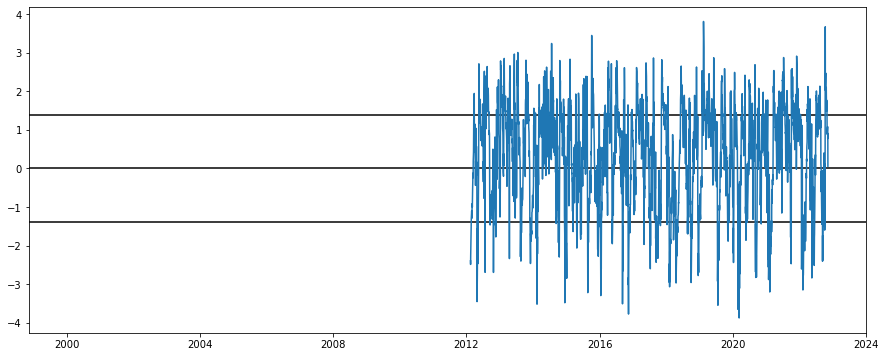

In [81]:
#Z-Score Plotted with respect to time
plt.figure(figsize=(15,6))
plt.axhline(y=0,color='black',linestyle='-')
plt.axhline(y=1.38,color='black',linestyle='-')
plt.axhline(y=-1.38,color='black',linestyle='-')
plt.plot(Data['Z_Score'])

In [82]:
#Constants and varaibles for trading algorithm
Return=[]
Return.append(1) 
Base=1
status = False
long = False
PEP_Weight=0.91
KO_Weight=0.09
Max_Threshold=1.05
Min_Threshold=0.9507

In [83]:
#This function calculates the return on the days we are trading and also sell trades if the return falls by a great fixed margin
#This function is only executed when we buy into the market
def checker(Base,i,long,status):
    if long == True: #Long Coke Short PEPsi
        Return.append(Return[-1]*(1+(Data['KO_Return'][i])*KO_Weight-(Data['PEP_Return'][i])*PEP_Weight))
        if Return[-1] > Max_Threshold*Base:
            Base = Return[-1]
            print(Return[-1])
        elif Return[-1] < Min_Threshold*Base:
            status = False
            print(Return[-1])
            Base = Return[-1]
        else:
            pass
            
    else: #Long PEPsi Short Coke
        Return.append(Return[-1]*(1-(Data['KO_Return'][i])*KO_Weight+(Data['PEP_Return'][i])*PEP_Weight))
        if Return[-1] > Max_Threshold*Base:
            Base = Return[-1]
        elif Return[-1] < Min_Threshold*Base:
            status = False
            Base = Return[-1]
        else:
            pass
    return status, Base
        

In [84]:
#This function is called when we are not holding an active postion
#Calls the function above whenever a trade deemed viable by Z-score comparisons
def buy(i):
        if ((Data['PEP'][i-1]) > ((Data['PEP'][i]) *1.1) and (Data['KO'][i-1]) > ((Data['KO'][i]) *1.1) ) :
            status = False
            long =False
            Return.append(Return[-1])
        else:
            if Data['Z_Score'][i]<-1.38:  #1.38"
                status = True
                long = False
                Return.append(Return[-1])
            elif Data['Z_Score'][i]>1.38:
                status = True 
                long = True
                Return.append(Return[-1])
            else:
                status = False
                long = False
                Return.append(Return[-1])
            
        return status, long
    
    


In [85]:
#Checks which function to call based on the output
#Loops through every day, allowing us to simulate returns over a given time period
def main(status, Base, long):
    for i in range(0,len(Data)-1):
        if status == False:
            status , long = buy(i)
        else:
            status , Base = checker(Base, i, long,status)
            
main(status, Base, long)

Text(0.5, 1.0, 'Return')

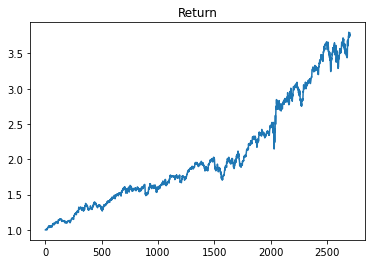

In [86]:
plt.plot(Return)
plt.title("Return")

In [87]:
Return=np.array(Return)
Return=pd.DataFrame(Return)
Return.columns=['Portfolio Return']
Return.index=Data.index

In [88]:
Market=yf.download('^GSPC',start='2012-02-14',end='2022-11-14')['Adj Close']
Market=pd.DataFrame(Market)
Market['Return']=Market['Adj Close'].pct_change()
Market=Market.dropna()

[*********************100%***********************]  1 of 1 completed


In [89]:
Market_Portfolio=[]
Market_Portfolio.append(1)

In [90]:
for i in range(len(Market)-1):
    Market_Portfolio.append(Market_Portfolio[i]*(1+Market['Return'][i]))

In [91]:
Market_Portfolio=np.array(Market_Portfolio)
Market_Portfolio=pd.DataFrame(Market_Portfolio)
Market_Portfolio.columns=['Market Return']
Market_Portfolio.index=Market.index
Market_Portfolio

,Market Return
Date,
2012-02-15,1.000000
2012-02-16,0.994617
2012-02-17,1.005583
2012-02-21,1.007945
2012-02-22,1.008671
...,...
2022-11-07,2.791966
2022-11-08,2.818808
2022-11-09,2.834587


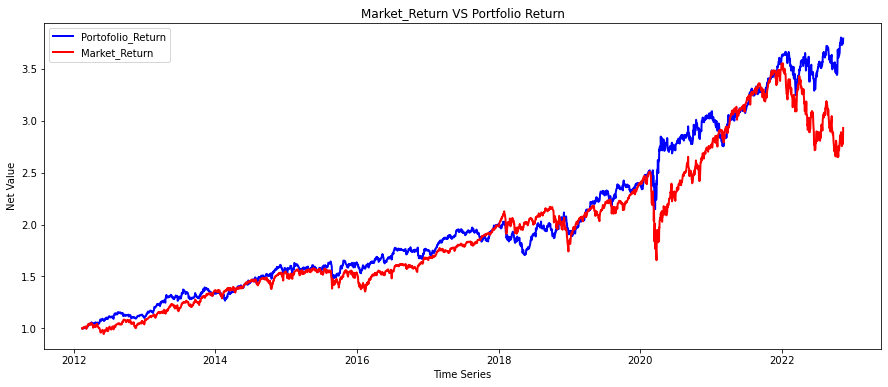

In [92]:
plt.figure(figsize=(15,6))
plt.plot(Return,lw=2,label='Portofolio_Return',color='blue')
plt.plot(Market_Portfolio,lw=2,label='Market_Return',color='red')
plt.title("Market_Return VS Portfolio Return")
plt.ylabel("Net Value")
plt.xlabel("Time Series")
plt.legend()

In [93]:
Return

,Portfolio Return
Date,
2012-02-15,1.000000
2012-02-16,1.000000
2012-02-17,1.000000
2012-02-21,0.999026
2012-02-22,1.005998
...,...
2022-11-07,3.743499
2022-11-08,3.769440
2022-11-09,3.778330


In [94]:
print("The Market Annual Return is",((Market_Portfolio.iloc[-1,-1]**(1/10)-1)*100).round(2),"%")
print("The Portfolio Annual Return is",((Return.iloc[-1,-1]**(1/10)-1)*100).round(2),"%")

The Market Annual Return is 11.35 %
The Portfolio Annual Return is 14.25 %
